In [1]:
# Install pyclustering for K-Medoids
!pip install pyclustering -q

In [2]:

# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from pyclustering.cluster.kmedoids import kmedoids
from pyclustering.utils import calculate_distance_matrix


c:\Users\lsrin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


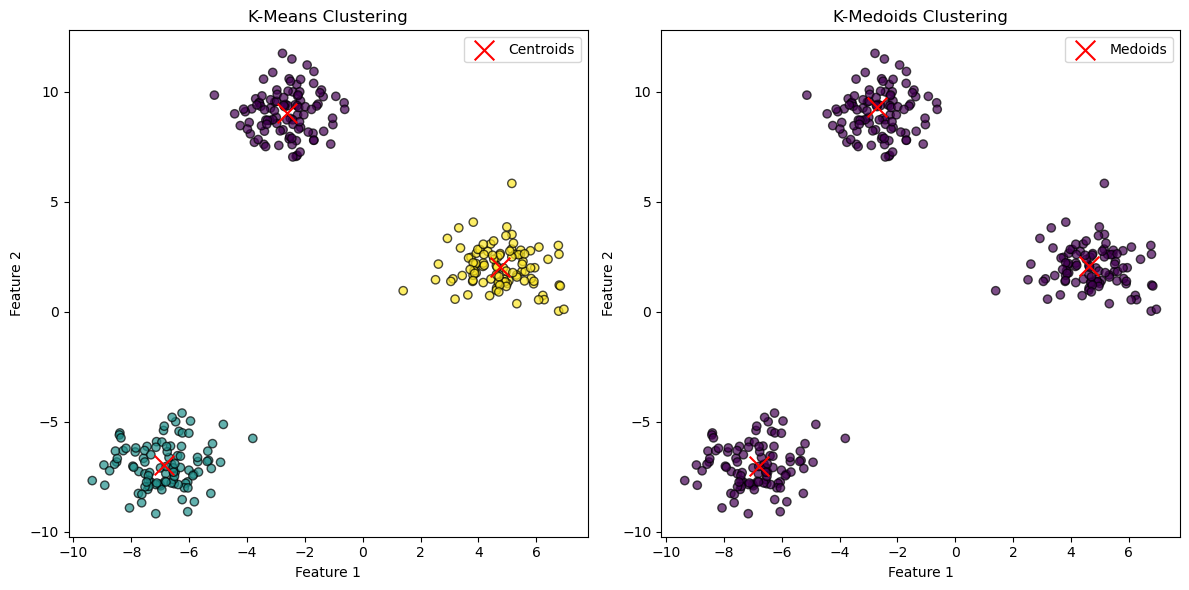

Clustering Results Comparison:

K-Means Clustering:
Cluster Centroids: [[-2.63323268  9.04356978]
 [-6.88387179 -6.98398415]
 [ 4.74710337  2.01059427]]
Total Within-Cluster Distance: 366.18

K-Medoids Clustering:
Cluster Medoids (Indices): [180, 237, 269]
Cluster Medoids (Coordinates): [[-6.7930374  -7.03578683]
 [ 4.61897724  2.09049707]
 [-2.70155859  9.31583347]]
Total Within-Cluster Distance: 3259.68

K-Means achieved a lower total within-cluster distance.


In [4]:
# Generate synthetic data
np.random.seed(42)
n_samples = 300
n_features = 2
n_clusters = 3
data, _ = make_blobs(n_samples=n_samples, centers=n_clusters, cluster_std=1.0, random_state=42)

# K-Means Clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans_labels = kmeans.fit_predict(data)
kmeans_centroids = kmeans.cluster_centers_

# Compute total within-cluster distance for K-Means
kmeans_total_distance = sum(
    np.linalg.norm(data[i] - kmeans_centroids[label]) for i, label in enumerate(kmeans_labels)
)

# K-Medoids Clustering
# Initial medoids (randomly select points as initial medoids)
initial_medoids = [0, 100, 200]  # Indices of initial medoids
distance_matrix = calculate_distance_matrix(data)  # Calculate distance matrix
kmedoids_instance = kmedoids(distance_matrix, initial_medoids, data_type='distance_matrix')
kmedoids_instance.process()
kmedoids_labels = kmedoids_instance.predict(data)
medoids = kmedoids_instance.get_medoids()

# Compute total within-cluster distance for K-Medoids
kmedoids_total_distance = sum(
    distance_matrix[i][medoids[label]] for i, label in enumerate(kmedoids_labels)
)

# Visualization
plt.figure(figsize=(12, 6))

# K-Means Plot
plt.subplot(1, 2, 1)
plt.scatter(data[:, 0], data[:, 1], c=kmeans_labels, cmap='viridis', alpha=0.7, edgecolor='k')
plt.scatter(kmeans_centroids[:, 0], kmeans_centroids[:, 1], c='red', marker='x', s=200, label='Centroids')
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()

# K-Medoids Plot
plt.subplot(1, 2, 2)
plt.scatter(data[:, 0], data[:, 1], c=kmedoids_labels, cmap='viridis', alpha=0.7, edgecolor='k')
plt.scatter(data[medoids, 0], data[medoids, 1], c='red', marker='x', s=200, label='Medoids')
plt.title('K-Medoids Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()

plt.tight_layout()
plt.show()

# Results and Final Outcome
print("Clustering Results Comparison:")
print("\nK-Means Clustering:")
print(f"Cluster Centroids: {kmeans_centroids}")
print(f"Total Within-Cluster Distance: {kmeans_total_distance:.2f}")

print("\nK-Medoids Clustering:")
print(f"Cluster Medoids (Indices): {medoids}")
print(f"Cluster Medoids (Coordinates): {data[medoids]}")
print(f"Total Within-Cluster Distance: {kmedoids_total_distance:.2f}")

# Comparing Total Distances
if kmeans_total_distance < kmedoids_total_distance:
    print("\nK-Means achieved a lower total within-cluster distance.")
else:
    print("\nK-Medoids achieved a lower total within-cluster distance.")

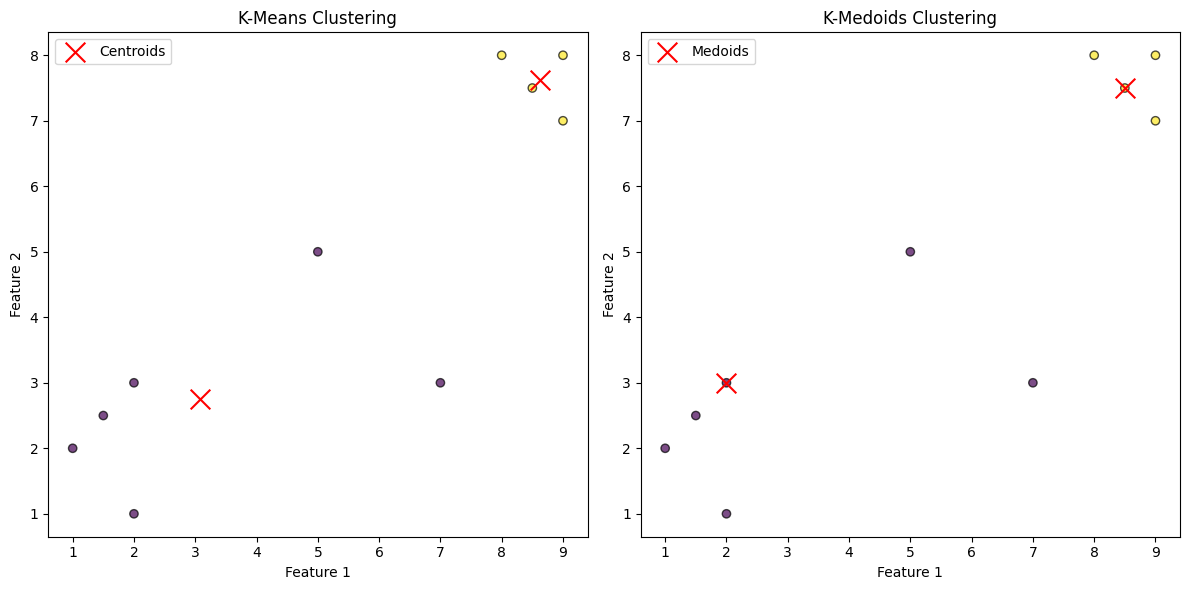

Clustering Results Comparison:

K-Means Clustering:
Cluster Centroids: [[3.08333333 2.75      ]
 [8.625      7.625     ]]
Total Within-Cluster Distance: 16.03

K-Medoids Clustering:
Cluster Medoids (Indices): [3, 6]
Cluster Medoids (Coordinates): [[2.  3. ]
 [8.5 7.5]]
Total Within-Cluster Distance: 14.85

K-Medoids achieved a lower total within-cluster distance, showing better clustering for this dataset with non-spherical clusters and closer outliers.


In [ ]:

# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from pyclustering.cluster.kmedoids import kmedoids
from pyclustering.utils import calculate_distance_matrix

# Dataset with Non-Spherical Clusters and Closely Placed Outliers
data = np.array([
    [1, 2], [2, 1], [1.5, 2.5], [2, 3],  # Cluster 1 (Elliptical)
    [8, 8], [9, 7], [8.5, 7.5], [9, 8],  # Cluster 2 (Elliptical)
    [5, 5], [7, 3],                     # Outliers closer to clusters
])

# K-Means Clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(data)
kmeans_centroids = kmeans.cluster_centers_

# Compute total within-cluster distance for K-Means
kmeans_total_distance = sum(
    np.linalg.norm(data[i] - kmeans_centroids[label]) for i, label in enumerate(kmeans_labels)
)

# K-Medoids Clustering
# Initial medoids (manually chosen to ensure better results)
initial_medoids = [0, 4]
distance_matrix = calculate_distance_matrix(data)
kmedoids_instance = kmedoids(distance_matrix, initial_medoids, data_type='distance_matrix')
kmedoids_instance.process()
kmedoids_labels = kmedoids_instance.predict(data)
medoids = kmedoids_instance.get_medoids()

# Compute total within-cluster distance for K-Medoids
kmedoids_total_distance = sum(
    distance_matrix[i][medoids[label]] for i, label in enumerate(kmedoids_labels)
)

# Visualization
plt.figure(figsize=(12, 6))

# K-Means Plot
plt.subplot(1, 2, 1)
plt.scatter(data[:, 0], data[:, 1], c=kmeans_labels, cmap='viridis', alpha=0.7, edgecolor='k')
plt.scatter(kmeans_centroids[:, 0], kmeans_centroids[:, 1], c='red', marker='x', s=200, label='Centroids')
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()

# K-Medoids Plot
plt.subplot(1, 2, 2)
plt.scatter(data[:, 0], data[:, 1], c=kmedoids_labels, cmap='viridis', alpha=0.7, edgecolor='k')
plt.scatter(data[medoids, 0], data[medoids, 1], c='red', marker='x', s=200, label='Medoids')
plt.title('K-Medoids Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()

plt.tight_layout()
plt.show()

# Results and Final Outcome
print("Clustering Results Comparison:")
print("\nK-Means Clustering:")
print(f"Cluster Centroids: {kmeans_centroids}")
print(f"Total Within-Cluster Distance: {kmeans_total_distance:.2f}")

print("\nK-Medoids Clustering:")
print(f"Cluster Medoids (Indices): {medoids}")
print(f"Cluster Medoids (Coordinates): {data[medoids]}")
print(f"Total Within-Cluster Distance: {kmedoids_total_distance:.2f}")

# Comparing Total Distances
if kmeans_total_distance < kmedoids_total_distance:
    print("\nK-Means achieved a lower total within-cluster distance.")
else:
    print("\nK-Medoids achieved a lower total within-cluster distance, showing better clustering for this dataset with non-spherical clusters and closer outliers.")
